> This assignment as two parts Section A and B. The first part is the implementation of function required in applying the CNN layers and the next section will be around the use of built in function of Tensorflow



`Before moving ahead as we have reached the stage of applying CNNs. We are going to deal with large number of parameters and hence more computational power. So you will need to connect runtime of collab to GPU: https://www.youtube.com/watch?v=-9CLfrZISRw`

### **BOTH THE SECTION CAN BE SOLVED INDEPENDENTLY** BUT SECTION A has **3X** more weightage than SECTION B doesn't have any code to write.

## **SECTION:A**

In [81]:
import numpy as np

In [82]:
import tensorflow as tf

In [83]:
device_list = tf.test.gpu_device_name()
print (device_list)

/device:GPU:0


### Q1: Complete the following function corr2d(X, K), which implements the cross correlation operation for matrix X and kernel K, both are two dimensional numpy arrays (height x width). The function should return a 2 dimensional numpy array which is the result of cross correlation operation between X and K. 

- not giving channels right now : assume channels = 1

In [84]:
def corr2d(X: np.array, K: np.array) -> np.array:
  n = X.shape[0]
  p= X.shape[1]
  m = K.shape[0]
  q=K.shape[1]
  #p = n-m+1
  y = np.zeros((n-m+1,p-q+1),dtype = float)

   
    # no padding for now and assume stride = 1
    ##generalised 
  for i in range(0,n-m+1):
    for j in range (0,p-q+1):
      y[i,j] = np.sum(X[i:m+i,j:q+j]*K)

      ##specific for given below arrays 
   #for i in range(0,n-m+1):
      #y[0,i] = np.sum(X[0:2,i:m+i]*K)
   #for i in range(0,n-m+1):
      #y[1,i] = np.sum(X[1:3,i:m+i]*K)
  
    
  return y


In [85]:
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], dtype=np.float32)
K = np.array([[0.0, 1.0], [2.0, 3.0]], dtype=np.float32)
print(corr2d(X, K)) # example done in class, try to print this and check if you get the right answer

[[19. 25.]
 [37. 43.]]


### now try to make a new function corr2d_multiple_input_channels(X, K) : where each X and K have the same number of channels, both of them are now 3 dimensional numpy arrays, the output should be a 2 dimensional numpy array (output_h, output_w).

- hint : Use the above corr2d function and read about np.stack

In [86]:
def corr2d_multiple_input_channels(X: np.array, K: np.array) -> np.array: 
    # write a function for this task
    a = X.shape[0]
    z=  np.zeros((3,2,2), dtype=float)
    for i in range(0,a):
      
       z[i]=(corr2d(new_X[i],new_K[i]))

    sum =np.zeros((2,2),dtype = float)
    for i in range(0,a):
      sum = sum +z[i]

    return sum



In [87]:
new_X = np.stack([X, X+1, X+2], axis=0) # stacking along a new dimension
new_K = np.stack([K, K+1, K+2], axis=0) 



print(f"new_X.shape = {new_X.shape}, new_K.shape = {new_K.shape}")
print(corr2d_multiple_input_channels(new_X, new_K))
# calculate the output by hand and then check whether you get the same answer
# answer should be a 2 dim np array : (output_height, output_width) 

new_X.shape = (3, 3, 3), new_K.shape = (3, 2, 2)
[[119. 149.]
 [209. 239.]]


### Write another function corr2d_mutli_in_out(X, K): where X (3 dim np array), K (4 dim numpy array), 0th dimension of K represents the number of kernel/filters we are using. Perform the cross correlation operation for K on X and return the output : 3 dim numpy array whose shape should be (num_output_channels, output_height, output_width)

- hint : use the above corr_2d_mutliple_input_channels(X, K) for each kernel in K and then stack them.

In [88]:
def corr2d_multi_in_out(X: np.array, K: np.array,axis) -> np.array:
    # X -> (num_in_channels, n_h, n_w)
    # K -> (num_out_channels, num_in_channels, k_h, k_w)
    # output -> (num_out_channels, o_h, o_w)
    z=np.zeros((4,2,2), dtype=float)
    for i in range(0,4):
      z[i] = corr2d_multiple_input_channels(new_X,my_K[i])


    sum =np.zeros((2,2),dtype = float)
    for i in range(0,4):
      sum = sum +z[i]

      
    return sum
    

In [89]:
my_K = np.stack([new_K, new_K+1, new_K+2, new_K + 3], axis=0) 
print(f"my_K.shape = {my_K.shape}")


print(corr2d_multi_in_out(new_X, my_K,0)) # cross check the calculation

my_K.shape = (4, 3, 2, 2)
[[476. 596.]
 [836. 956.]]


### Q2: What is the computational and statistical benefits of stride larger than 1?? (not more than 20 word answer for each)

reduce computational complexity it decreses the convolutionL operation and as it skips few input locations so it increses computational efficiency.


statistical benefits :  noice reduction : by keeping stride larger than 1 consecutive data points may contain similar 
informationrather than this we can focus on large scale pattern 
of our data.By skipping data points, we can focus on key features which may reveal important insights.



### Q3: Now let's implement a model with just a single convolution layer, given X(input), Y(output) and K(kernel). Y is the output of the cross-correlation operation of K on X. You need to build a model to learn that kernel K.(try to print the kernel at each epoch)

- hint : conv_layer(output_channels = 1, input_channels = 1, kerenl_size=(1, 2), bias=False)

In [90]:
X = np.ones((6, 8), dtype=np.float32)
X[:, 2:6] = 0
print(X)
print(X.shape)

[[1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]]
(6, 8)


In [91]:
K = np.array([[1.0, -1.0]], dtype=np.float32) # kernel, you need to learn this using a model
#K1 = np.reshape(K, (1,2))
#print(K1)
#print(K1.shape)
Y = corr2d(X, K) 
print(Y)

[[ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]]


In [92]:
X = X.reshape((1, 6, 8,1)) # this will be the input to the model
Y = Y.reshape(( 1, 6,7,1)) # this is the output, to be used while calculation loss
lr = 3e-2 # use this learning rate
print(X.shape)
print(Y)

(1, 6, 8, 1)
[[[[ 0.]
   [ 1.]
   [ 0.]
   [ 0.]
   [ 0.]
   [-1.]
   [ 0.]]

  [[ 0.]
   [ 1.]
   [ 0.]
   [ 0.]
   [ 0.]
   [-1.]
   [ 0.]]

  [[ 0.]
   [ 1.]
   [ 0.]
   [ 0.]
   [ 0.]
   [-1.]
   [ 0.]]

  [[ 0.]
   [ 1.]
   [ 0.]
   [ 0.]
   [ 0.]
   [-1.]
   [ 0.]]

  [[ 0.]
   [ 1.]
   [ 0.]
   [ 0.]
   [ 0.]
   [-1.]
   [ 0.]]

  [[ 0.]
   [ 1.]
   [ 0.]
   [ 0.]
   [ 0.]
   [-1.]
   [ 0.]]]]


In [93]:
import tensorflow as tf 
cnn_model = tf.keras.models.Sequential()

In [94]:
cnn_model.add(tf.keras.layers.Conv2D(1, (1, 2), use_bias=False))

In [95]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=lr),
              loss = 'mse',
                  metrics=['accuracy'])


In [ ]:
epochs = 100
for i in range (epochs):
  model.fit(X, Y , epochs = 1)
  kernel = model.get_weights()[0]
  kernel = np.array(kernel).flatten()
  kernel = kernel.reshape((1,2))
  print(kernel)

### Q4: Complete the following function max_pool2d(X, K) which performs maxpooling with kernel size K on X and returns and two dim numpy array

In [97]:
def max_pool2d(X: np.array, K: tuple) -> np.array:
    # write a function for this job
    n = X.shape[0]
    #p = n-m+1
    y = np.zeros((n-1,n-1),dtype = float)
    z= np.zeros((n-1,n-1),dtype = float)

   
    # no padding for now and assume stride = 1
    ##generalised 
    for i in range(0,n-1):
      for j in range (0,n-1):
        y = X[i:2+i,j:2+j]
        z[i,j] = y.max()

    return z

In [98]:
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], dtype=np.float32)
print(X.shape)
max_pool2d(X, (2, 2)) # check if the output matches with your calculation

(3, 3)


array([[4., 5.],
       [7., 8.]])

# **SECTION:B**



### **JUST RUN THE CELLS AND VISUALIZE**( Nothing to code 🙂 )

> Indented block



In [99]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [100]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3)

170498071/170498071 [==============================] - 3s 0us/step


In [102]:
# Print shape of all 4 variables: X_train,Y_train,X_test, and Y_test
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(35000, 32, 32, 3)
(15000, 32, 32, 3)
(35000, 1)
(15000, 1)


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


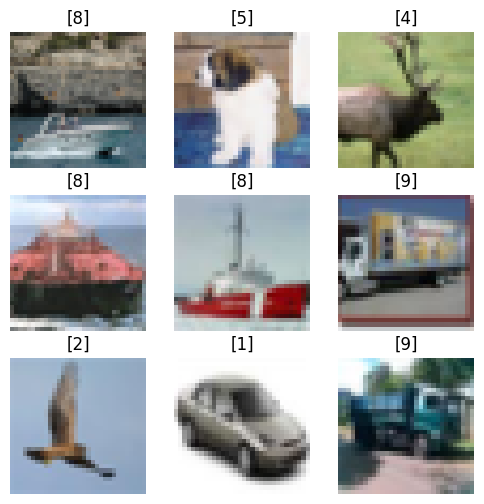

In [101]:
#Lets visualize the CIFAR-10 dataset

import random
figure = plt.figure(figsize=(6,6))

for i in range(9):
  index = random.randint(0,len(X_train)-1) # showing the index_th image
  
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[index])
  plt.title(Y_train[index])
  plt.axis(False)

In [103]:
"""
So you can probably notice here that the images are 3D(coloured) but still 
not of great quality ( what can you expect from 32x32 image). Also there are
certain other factors which makes the classification a bit tougher than the 
cases of 2D( the digit and the fashion data) you dealt before. We will try to
understand the difficulties and find probable solution for them.
"""

'\nSo you can probably notice here that the images are 3D(coloured) but still \nnot of great quality ( what can you expect from 32x32 image). Also there are\ncertain other factors which makes the classification a bit tougher than the \ncases of 2D( the digit and the fashion data) you dealt before. We will try to\nunderstand the difficulties and find probable solution for them.\n'

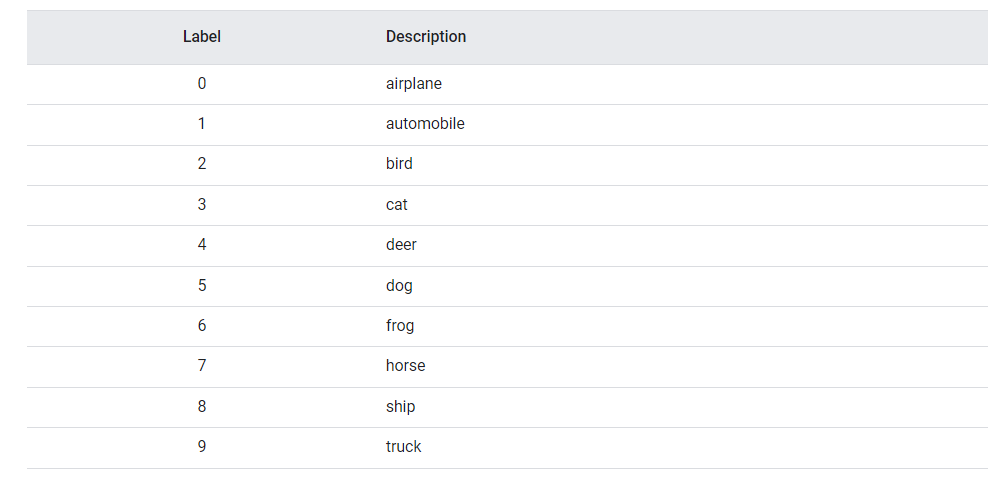

In [104]:
"""
Lets first start with the CNN model discussed in the class for digit
 classification. Notice that I have changed the input shape for this usecase.
 Earlier it was (28,28,1) for the digit dataset.
"""

'\nLets first start with the CNN model discussed in the class for digit\n classification. Notice that I have changed the input shape for this usecase.\n Earlier it was (28,28,1) for the digit dataset.\n'

In [105]:
# model initialization
cnn_model = tf.keras.Sequential()

# adding the 1st layer of CNN
cnn_model.add(tf.keras.layers.Conv2D(26, (5,5), activation = 'relu', input_shape=(32,32,3)))

# adding a maxpooling
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#adding another CNN layer
cnn_model.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu'))

# adding another maxpooling layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#flattening the layer
cnn_model.add(tf.keras.layers.Flatten())

# 20 x 20 x 16
#dense layer
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer 
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [106]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [107]:
"""
Explain what is Adam optimizer below in atleast 250 words.[ read on web and explain ]

Answer:adam optimizer is an optimization technique which we can say is the extension of SGD sochastic gradient descent technique 
the main benefit with adam is that it combines the benefits of two optimization techniques momentum with SGD  and adagrad former 
one deals with the speed   it uses the previous gradients, if all previous gradients are giving indication to move in one particular 
direction then it will increse speed in that direction it has the capability to move out of the local minima suboptimization  which we 
can t do in gradient descent optimization the latter one deal with with learning rate optimization in all other techniques 
like SGD , momentum (sgd) we have fix learning rate problem but it can change learning rate according to dataset (one example
 we can think of if we have sparse data then in the sparse dataset(column ) case the parameter which  not depends on  sparse dataset 
then the update in that patrametyer is big so we make that parameters learning rate small so that we can make both the
 parameters updates comparable
 while the parameter which depends on sparse dataset 
the update in that parameter willbe small. so adam provides the merge of these two problems of learning rate and local minima situation
saddle point (in this case as grad(loss functio) wwrt parameter =0 so it will badly alter update in that parametder and make
the updation very small) so adam is most powerful optimization technique.



"""

'\nExplain what is Adam optimizer below in atleast 250 words.[ read on web and explain ]\n\nAnswer:adam optimizer is an optimization technique which we can say is the extension of SGD sochastic gradient descent technique \nthe main benefit with adam is that it combines the benefits of two optimization techniques momentum with SGD  and adagrad former \none deals with the speed   it uses the previous gradients, if all previous gradients are giving indication to move in one particular \ndirection then it will increse speed in that direction it has the capability to move out of the local minima suboptimization  which we \ncan t do in gradient descent optimization the latter one deal with with learning rate optimization in all other techniques \nlike SGD , momentum (sgd) we have fix learning rate problem but it can change learning rate according to dataset (one example\n we can think of if we have sparse data then in the sparse dataset(column ) case the parameter which  not depends on  spar

### **Make sure that you are connected to GPU runtime other wise the training in next cell is going to take a long time**

In [109]:
history = cnn_model.fit(X_train, Y_train, epochs=10, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


875/875 [==============================] - 15s 4ms/step - loss: 2.5449 - accuracy: 0.1000 - val_loss: 2.3031 - val_accuracy: 0.0944
Epoch 2/10
875/875 [==============================] - 4s 5ms/step - loss: 2.3015 - accuracy: 0.1021 - val_loss: 2.3023 - val_accuracy: 0.0959
Epoch 3/10
875/875 [==============================] - 4s 4ms/step - loss: 2.3003 - accuracy: 0.1017 - val_loss: 2.3038 - val_accuracy: 0.0957
Epoch 4/10
875/875 [==============================] - 3s 4ms/step - loss: 2.3033 - accuracy: 0.1034 - val_loss: 2.3029 - val_accuracy: 0.0934
Epoch 5/10
875/875 [==============================] - 4s 5ms/step - loss: 2.3024 - accuracy: 0.1026 - val_loss: 2.3031 - val_accuracy: 0.0933
Epoch 6/10
875/875 [==============================] - 3s 4ms/step - loss: 2.3020 - accuracy: 0.1006 - val_loss: 2.3024 - val_accuracy: 0.0951
Epoch 7/10
875/875 [==============================] - 4s 4ms/step - loss: 2.3016 - accuracy: 0.0994 - val_loss: 2.3036 - val_accuracy: 0.0940
Epoch 8/10
875/8

In [110]:
""" 
Write about validation accuracy in 100 words.
Answer: validation accuracy is used to determine the performance of trained  model  on new data(test data) validation accuracy tells how our 
trained model is generalized for new data points .higher the validation accuracy means that our trained model is very well generalized for unseen data point
it tell us that model has larned how well model has learned from training dataset it plays a crucial role in model selection
and hyperparameter tuning (Hyperparameter tuning involves searching for the best combination of hyperparameters that maximizes 
the model's performance on a validation set. hyperparameters include the learning rate, regularization strength, batch size, number of hidden
 layers in a neural network by choosing different combintions of hyperparmeter and training and evaluating model on those combination
 e get accuracy or loss are compared within the combianations to obtain better hyperparameter to obtain better generalized model )
"""

" \nWrite about validation accuracy in 100 words.\nAnswer: validation accuracy is used to determine the performance of trained  model  on new data(test data) validation accuracy tells how our \ntrained model is generalized for new data points .higher the validation accuracy means that our trained model is very well generalized for unseen data point\nit tell us that model has larned how well model has learned from training dataset it plays a crucial role in model selection\nand hyperparameter tuning (Hyperparameter tuning involves searching for the best combination of hyperparameters that maximizes \nthe model's performance on a validation set. hyperparameters include the learning rate, regularization strength, batch size, number of hidden\n layers in a neural network by choosing different combintions of hyperparmeter and training and evaluating model on those combination\n e get accuracy or loss are compared within the combianations to obtain better hyperparameter to obtain better gene

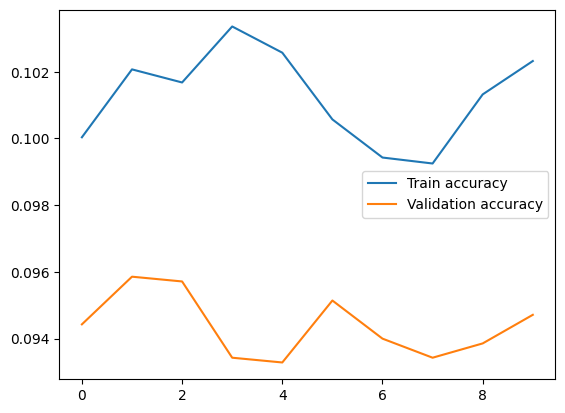

In [111]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [112]:
"""
What do you think is happening? Is the model training or not?
 You can see that both the training and validation accuracy are
 just roaming around 0.1. 
 One reason for this can be our model architecture. We had 26 filters
 in our first layer and 16 filters in our next layer. This funnel down approach
 works for dense layers but for Conv layers( which are good at feature extraction)
 we want them to extract more and more features.

 So lets change that to funne up --> 16 and 32 in the layers respectively
"""

'\nWhat do you think is happening? Is the model training or not?\n You can see that both the training and validation accuracy are\n just roaming around 0.1. \n One reason for this can be our model architecture. We had 26 filters\n in our first layer and 16 filters in our next layer. This funnel down approach\n works for dense layers but for Conv layers( which are good at feature extraction)\n we want them to extract more and more features.\n\n So lets change that to funne up --> 16 and 32 in the layers respectively\n'

In [114]:
# model initialization
cnn_model = tf.keras.Sequential()

"""adding the 1st layer of CNN(Changed)"""
cnn_model.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu', input_shape=(32,32,3)))

# adding a maxpooling
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

"""adding the 2nd layer of CNN(Changed)"""
cnn_model.add(tf.keras.layers.Conv2D(32, (5,5), activation = 'relu'))

# adding another maxpooling layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#flattening the layer
cnn_model.add(tf.keras.layers.Flatten())

# 20 x 20 x 16
#dense layer
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer 
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [115]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [116]:
history = cnn_model.fit(X_train, Y_train, epochs=20, validation_split=0.2)

Epoch 1/20
875/875 [==============================] - 6s 4ms/step - loss: 2.6587 - accuracy: 0.1798 - val_loss: 1.9368 - val_accuracy: 0.2766
Epoch 2/20
875/875 [==============================] - 4s 5ms/step - loss: 1.8129 - accuracy: 0.3319 - val_loss: 1.7283 - val_accuracy: 0.3624
Epoch 3/20
875/875 [==============================] - 4s 4ms/step - loss: 1.6507 - accuracy: 0.4049 - val_loss: 1.5568 - val_accuracy: 0.4364
Epoch 4/20
875/875 [==============================] - 4s 4ms/step - loss: 1.5105 - accuracy: 0.4603 - val_loss: 1.4866 - val_accuracy: 0.4569
Epoch 5/20
875/875 [==============================] - 4s 4ms/step - loss: 1.4081 - accuracy: 0.4977 - val_loss: 1.4654 - val_accuracy: 0.4836
Epoch 6/20
875/875 [==============================] - 4s 4ms/step - loss: 1.3366 - accuracy: 0.5245 - val_loss: 1.5359 - val_accuracy: 0.4674
Epoch 7/20
875/875 [==============================] - 4s 4ms/step - loss: 1.2648 - accuracy: 0.5531 - val_loss: 1.4230 - val_accuracy: 0.5016
Epoch 

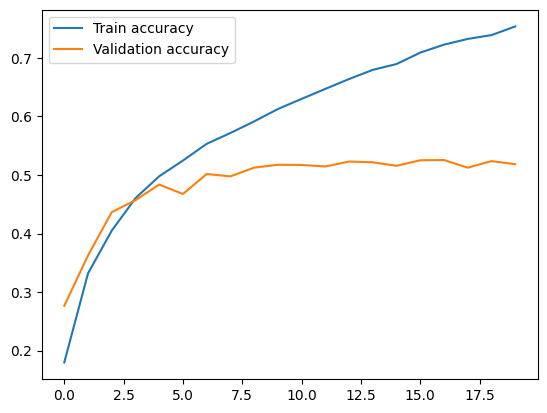

In [117]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [118]:
"""
Did our model improved?? 
ANSWER : yes
Are we done with the job? 
ANSWER : no
What is happening after 5( roughly ) epochs? Why is there a gap between
training and validation accuracy?
ANSWER : OUR MODEL UNDERGOING OVERFITTING  
         there is gap between traing and validation accuracy and it is still incresing which may have some reasons :
         1: Model COMPLEXITY  is high which is allowing our model to memorize on training data rather than learning general patterns
            in data

         2: there is lack of appropriate REGULARIZATION techniques in our model to prevent this overfitting

Our training accuracy reached to 0.73( and still increasing ) but 
the validation accuracy seems to stagnate at 0.52.

Is our model overfitting on the training data so much that it can't work well 
on unseen data.

ANSWER: yes our model is overfitting as our training accuracy keep going on incresing so low bias and as
        training accuracy keep on increasing (bias value keeps on dercresing ) but our validation a curacy almost becoming
        stagnant so variance is keep incresing between taining data and valifdation data therefore right now model has high
        variance and low bias which is overfitting
"""

"\nDid our model improved?? \nANSWER : yes\nAre we done with the job? \nANSWER : no\nWhat is happening after 5( roughly ) epochs? Why is there a gap between\ntraining and validation accuracy?\nANSWER : OUR MODEL UNDERGOING OVERFITTING  \n         there is gap between traing and validation accuracy and it is still incresing which may have some reasons :\n         1: Model COMPLEXITY  is high which is allowing our model to memorize on training data rather than learning general patterns\n            in data\n\n         2: there is lack of appropriate REGULARIZATION techniques in our model to prevent this overfitting\n\nOur training accuracy reached to 0.73( and still increasing ) but \nthe validation accuracy seems to stagnate at 0.52.\n\nIs our model overfitting on the training data so much that it can't work well \non unseen data.\n\nANSWER: yes our model is overfitting as our training accuracy keep going on incresing so low bias and as\n        training accuracy keep on increasing (bia

In [119]:
"""
How are we gonna tackel this problem?

ANSWER : we will implement some regularization technquies in our model (L1 and L2) will add some dropout layers and 
         regularization layers  , adjusting hyperparameters
         
Well, we will see that in next part of this assignment.
Till then lets learn about about overfitting.
"""

'\nHow are we gonna tackel this problem?\n\nANSWER : we will implement some regularization technquies in our model (L1 and L2) will add some dropout layers and \n         regularization layers  , adjusting hyperparameters\n         \nWell, we will see that in next part of this assignment.\nTill then lets learn about about overfitting.\n'

> **Well using Chatgpt to answer these question is something which everyone can think of right?? To create a difference write answer in your own terms after reading from web or reading the answer of Chatgpt.**
### **After all this is your midterm evaluation. Cheating is something we can catch easily** ( we have also done this )

In [120]:
"""
[CLARIFICATION]: Reading and understanding by searching on Chatgpt is not 
considered as cheating as long as you are writing that in your own word
( only problem is the crediblity of its information)

"""

'\n[CLARIFICATION]: Reading and understanding by searching on Chatgpt is not \nconsidered as cheating as long as you are writing that in your own word\n( only problem is the crediblity of its information)\n\n'

In [121]:
"""
Question: What is overfitting and underfitting below ( atleast 200 words )

Answer: Bias: the inability of a machine learning model to truely capture the relationship in the training data,if we have high bias
 that means that our model  is unable to identify the pattern or performing bad  in training data
 Variance :  consider there is a model which is given some error a with training data and giving error b with test data
  then variance (|a-b|) if this difference is more then we have high variability in our model 
  1. so when our model is working very well with training data(low bias ) so error in training part is small then it will have high
  variance then this is called "overfitting"
  2. When a model underfits, it fails to learn the training data effectively and performs poorly not only on the training data
   but also on new, unseen data (test data) that will cause "high BIAS"  and so less variance

   for better working of our model we want low bias as well as low variance
"""

'\nQuestion: What is overfitting and underfitting below ( atleast 200 words )\n\nAnswer: Bias: the inability of a machine learning model to truely capture the relationship in the training data,if we have high bias\n that means that our model  is unable to identify the pattern or performing bad  in training data\n Variance :  consider there is a model which is given some error a with training data and giving error b with test data\n  then variance (|a-b|) if this difference is more then we have high variability in our model \n  1. so when our model is working very well with training data(low bias ) so error in training part is small then it will have high\n  variance then this is called "overfitting"\n  2. When a model underfits, it fails to learn the training data effectively and performs poorly not only on the training data\n   but also on new, unseen data (test data) that will cause "high BIAS"  and so less variance\n\n   for better working of our model we want low bias as well as lo

In [ ]:
"""
Question: What are regularization techniques in machine learning?(200 words)

Answer: Regularization techniques in machine learning are methods used to avoid overfitting and improve the 
generalization performance of a model. overfitting occurs when model  learns the training data very well
therefore variance high  regularization helps in avoiding this overfiiting(high variance) by adding a term in the loss function we will understand
it using linear regression model example(loss function = loss error term +lambda(m^2)) where m is slope in linear regression 
IN CASE OF OVERFITTING we have to reduce the slope value if data is fitting over all training points by reducing the
 slope we can reduce variance significantly. just by increasing the bias by small amount(keeping bias still low) so it will balance both bias as well as variance 
 this is called L2 regularisation called "ridge regularization" 
 

"""

In [123]:
"""
Question: What dropout layer and what does it do?( read it from Tensorflow.org and write in 200 words)

Answer: dropout is an regularization technique that is usually used to prevent overfitting when model is too good in learning or we can say model is good in
        cramming the training data.
        The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time,
        which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all
        inputs is unchanged.
        Dropout technique works by randomly reducing the number of interconnecting neurons within a neural network.
         At every training step, each neuron has a chance of being left out, or rather, dropped out of the collated
              contribution from connected neurons.

     This technique minimizes overfitting because each neuron becomes independently sufficient, in the sense that the neurons
     within the layers learn weight values that are not based on the cooperation of its neighbouring neurons

        link: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout#:~:text=The%20Dropout%20layer%20randomly%20sets,over%20all%20inputs%20is%20unchanged.
"""          ''' https://towardsdatascience.com/understanding-and-implementing-dropout-in-tensorflow-and-keras-a8a3a02c1bfa'''

'\nQuestion: What dropout layer and what does it do?( read it from Tensorflow.org and write in 200 words)\n\nAnswer: dropout is an regularization technique that is usually used to prevent overfitting when model is too good in learning or we can say model is good in\n        cramming the training data.\n        The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time,\n        which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all\n        inputs is unchanged.\n        Dropout technique works by randomly reducing the number of interconnecting neurons within a neural network.\n         At every training step, each neuron has a chance of being left out, or rather, dropped out of the collated\n              contribution from connected neurons.\n\n     This technique minimizes overfitting because each neuron becomes independently sufficient, in the sense that the neurons\n     within th

In [ ]:
"""
Question: What is L1 normalization? write its formulae as well( atleast 200 words )

Answer: [[a ,b],[c,d]] is 2d arrray applying l1 normalization on each row we get [[a/a+b,b/a+b],[c/c+d,d/c+d]]
         above shown examlple we have done sample normalization
         sample normalization is useful when sample data has different units for measurement

         if we want to do feature normalization we can do by [[a/a+c,b/b+d],[c/a+c,d/b+d]]
         so this can be helpful if we are dealing with features having different scales 
"""##It may be defined as the normalization technique that modifies the dataset values in a way that in each 
##row the sum of the absolute values will always be up to 1. It is also called Least Absolute Deviations

link  : https://stats.stackexchange.com/questions/502387/what-is-the-l1-normalization-of-some-data4
    #L1 normalization can be helpful when we want the relative proportion ofvalues in dataset not just want to focus only on 
    #magnitude of value
    link : https://www.youtube.com/watch?v=bx7FqwVfTkg&t=673s

In [ ]:
"""
Question: What is L2 normalization? write its formulae as well( atleast 200 words )

Answer: l2 feature normalization : [[a ,b],[c,d]] ----> [[a/(a^2+c^2)^1/2,b/(b^2+d^2)^1/2],[c/(a^2+c^2)^1/2,d/(b^2+d^2)^1/2]]
similary sample normalization.  in L2 normalization  root of sum of square is always of norm 1 l2 normalization is used when we want 
to scales the datavalues  of our fataset by keeping the  relative distances between our datapoints same.
link :https://www.youtube.com/watch?v=bx7FqwVfTkg&t=673s
L2 NORMALIZATION  works on overall pattern of our dataset rather on individual values this can completely 
change the closness or fartherness between data point to give better result about datapoints how far or close acctually they are
by keeping track of whole data patterns not just identifying patternds in individual points.
"""

In [ ]:
"""
Question: What is data augmentation techniques and why is it needed in machine learning?( atleast 200 words )

ANSWER: data augumentation means creating data in large number by using some techniques data augumenatation means increasing
training dataset by applying some modification in  exisiting dataset which well give our model much diversified and varied data which will 
train our model not just on GIVEN TRAINIG DATAin a memorizing way but will train our model to predicton unseen data in more 
generalized way  due to variation in existing data.
"""